# Predicting the sale price of Bulldozers using Machine Learning

# 1. Problem Dedinition

How accurate can we predict the future sale of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for? 

# 2. Data

Data used is from kaggle : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# 3. Evaluation 

The evaluation metric for this Analysis RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note**: The goal for most regression evaluation metrics is to minmize the error. For example,our goal for this project will be to build a machine learning model which minimises RMSLE.


# 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
d = pd.read_csv("TrainAndValid.csv", low_memory = False)
d

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
d.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<Axes: ylabel='Frequency'>

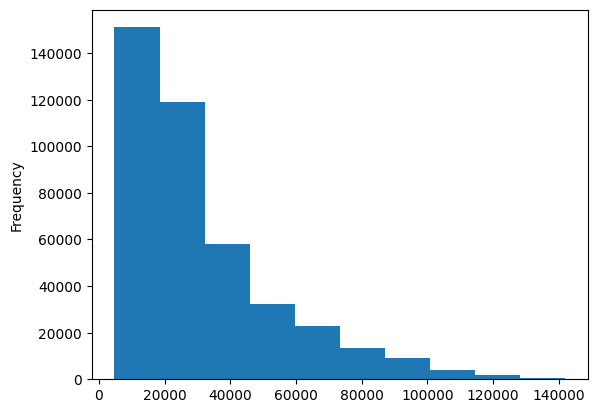

In [5]:
d.SalePrice.plot.hist()

# Converting SalesDate to "parsing Dates" 

**Importing Data again but in the form of Parse date(Datetime Object)**


In [6]:
df = pd.read_csv("TrainAndValid.csv",low_memory = False, parse_dates = ["saledate"])
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [7]:
df.saledate.dtype

dtype('<M8[ns]')

In [8]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

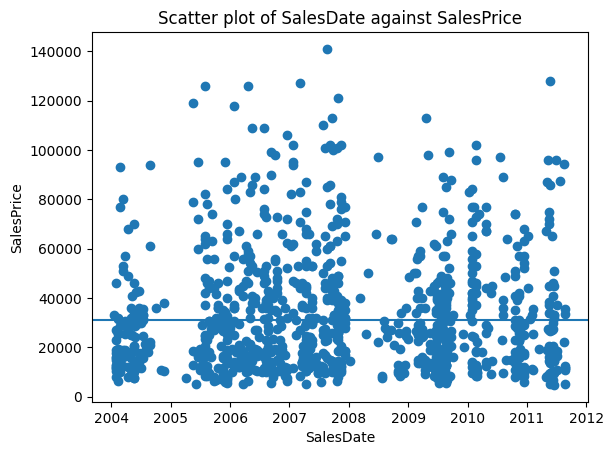

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])
ax.set(title = "Scatter plot of SalesDate against SalesPrice", xlabel ="SalesDate", ylabel ="SalesPrice")
ax.axhline(df.SalePrice.mean(), linestyle ="-")

In [10]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

**Making a copy of Dataframe and then sort our dataframe by saledate**

In [11]:
df_copy = df.copy()

**Sorting Dataframe by SaleDate**

In [12]:
df_copy.sort_values(by = ["saledate"], inplace = True, ascending = True)

In [13]:
df_copy.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

**Adding datetime parameter for saledate column**

In [14]:
df_copy[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [15]:
df_copy[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [16]:
df_copy[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [17]:
df_copy["SaleYear"] = df_copy.saledate.dt.year
df_copy["SaleMonth"] = df_copy.saledate.dt.month
df_copy["SaleDay"] = df_copy.saledate.dt.day
df_copy["SaleDayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["SaleDayOfYear"] = df_copy.saledate.dt.dayofyear

In [18]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


**Checking values of different columns**

In [19]:
# Lets remove saledate since we have added some datetime features to our data
df_copy.drop("saledate", axis = 1, inplace = True)

In [20]:
df_copy.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Converting string in to categories(one way of converting all data to numbers)

In [21]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


**figuring out what type fo dtype "UsageBand" is**

In [22]:
pd.api.types.is_object_dtype(df_copy["UsageBand"])

True

#### Finding columns that contain object types

In [23]:
for label, content in df_copy.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
for label, content in df_copy.items():
    if pd.api.types.is_object_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()

**Confirming that our string(Object dtype) has been changed to category**

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [26]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [28]:
df_copy.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [29]:
df_copy.isnull().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

# Fill missing Values

### Filling numeric missing values



**Checking what columns have numerical values**


In [30]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [31]:
df_copy.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

### Checking for which numeric columns have null values

In [32]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


### Filling the numeric rows with missing values with the median

In [33]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_copy[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_copy[label] = content.fillna(content.median())

### Checking if there is any null numeric value(Note that nothing will be printed out since we have filled the missing numeric value)

In [34]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [35]:
df_copy.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [36]:
df_copy.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling and turning categorical variables in to Numbers

In [37]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
pd.Categorical(df_copy["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [39]:
pd.Categorical(df_copy["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True)

### Turning variables in one column with categorical dtype in to numbers

### Turn all categorical variables in to numbers and fill missing

In [40]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Adding binary column to indicate whether sample had missing value
        df_copy[label+"is_missing_"] = pd.isnull(content)
        #Turn categories in to number and add +1 to assign the missing category values 0 rather than the standard -1
        df_copy[label] = pd.Categorical(content).codes +1

**Lets add +1 to reassign the -1 value in the code above with a 0 value. Note that -1 is assigned to a categorical cell which has a missing value and some numbers are assigned to categorical cell with values**

In [41]:
pd.Categorical(df_copy["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [42]:
pd.Categorical(df_copy["UsageBand"]).codes +1 # Now -1 is now 0

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [43]:
pd.Categorical(df_copy["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing_
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [45]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing_,False,True,False,True,False
Blade_Typeis_missing_,False,True,False,True,False
Travel_Controlsis_missing_,False,True,False,True,False
Differential_Typeis_missing_,True,False,True,False,True


In [46]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mountingis_missing_     0
Blade_Typeis_missing_           0
Travel_Controlsis_missing_      0
Differential_Typeis_missing_    0
Steering_Controlsis_missing_    0
Length: 103, dtype: int64

### Building a machine learning model. Since data is all numeric and no missing values we can now build a machine learning model.

In [47]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing_,False,True,False,True,False
Blade_Typeis_missing_,False,True,False,True,False
Travel_Controlsis_missing_,False,True,False,True,False
Differential_Typeis_missing_,True,False,True,False,True


In [48]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Instatiate model
model = RandomForestRegressor(n_jobs = -1, random_state = 42)

# Fit the model
model.fit(df_copy.drop("SalePrice", axis = 1), df_copy["SalePrice"])

CPU times: total: 44min 28s
Wall time: 6min 24s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
# Score model

model.score(df_copy.drop("SalePrice", axis = 1), df_copy["SalePrice"])

0.9875468079970562

### Splitting Data in to Training and Valid Sets

In [50]:
 df_copy.SaleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: SaleYear, Length: 412698, dtype: int32

In [51]:
df_val = df_copy[df_copy.SaleYear == 2012]
df_train = df_copy[df_copy.SaleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

### split data in to X and y

In [52]:
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis =1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [53]:
### Building an evaluation function for our RMSLE

In [54]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_preds, y_test):
    """"
    This function calculates the root mean squared error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))  

### Create a function to evaluate model on afew different levels 

In [55]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

#### Change max_samples value

In [56]:
model = RandomForestRegressor(n_jobs = -1, random_state = 42, max_samples = 1000)
model

RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

In [57]:
%%time

np.random.seed(42)
#Cutting down on the max number of samples each estimator can see imporves training time
model.fit(X_train, y_train)

CPU times: total: 16 s
Wall time: 2.85 s


RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

In [58]:
from sklearn.metrics import r2_score

In [59]:
show_scores(model)

{'Training MAE': 7665.083066051727,
 'Valid MAE': 9132.679371813705,
 'Training RMSLE': 0.3411018319032423,
 'Valid RMSLE': 0.3762446378810512,
 'Training R^2': 0.7559381504200411,
 'Valid R^2': 0.7507358682022224}

### Hyperparameter tunning with RandomizedSearchCV

In [60]:
np.random.seed=42

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples":[10000]}

# Instatiating RandomForestSearchCV model1
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 42),
                              param_distributions = rf_grid,
                              n_iter =10,
                              cv =5,
                              verbose = True)

# fit the RandomForestSeachCV
rs_model.fit(X_train, y_train)                 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
rs_model.best_params_   #Note that this might not be the best hypereparameters because we only 
                        #have set the n_iter to just 10

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

**Evaluating the RandomizedSearchCV model**

In [62]:
show_scores(rs_model)

{'Training MAE': 6465.359767604394,
 'Valid MAE': 7792.965908792966,
 'Training RMSLE': 0.2907365114610109,
 'Valid RMSLE': 0.3146049386188446,
 'Training R^2': 0.8149331273057713,
 'Valid R^2': 0.8006810792649001}

### Training a model with the best hyperparameters

In [63]:
%%time

ideal_model = RandomForestRegressor(n_estimators= 80,
                                    min_samples_split = 14,
                                    min_samples_leaf= 11,
                                    max_samples= 10000,
                                    max_features=0.5,
                                    max_depth= None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 11 s
Wall time: 17.2 s


RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=11,
                      min_samples_split=14, n_estimators=80)

In [64]:
#scores for ideal model(trained on all the data)

show_scores(ideal_model)

{'Training MAE': 6462.894768309662,
 'Valid MAE': 7748.148464210679,
 'Training RMSLE': 0.2908975849784147,
 'Valid RMSLE': 0.31296050139589243,
 'Training R^2': 0.8153289606794476,
 'Valid R^2': 0.8035392553194468}

In [65]:
#scores for rs_model(trained on 10,000 examples)
show_scores(rs_model)

{'Training MAE': 6465.359767604394,
 'Valid MAE': 7792.965908792966,
 'Training RMSLE': 0.29073651146101087,
 'Valid RMSLE': 0.3146049386188446,
 'Training R^2': 0.8149331273057713,
 'Valid R^2': 0.8006810792649002}

## Make predictions on our test data

Lets first of all import our data and preprocess data(turning the test datasets in the same format as the training data sets)

In [66]:
# Import the test data 
df_test = pd.read_csv("Test.csv", low_memory = False, parse_dates =["saledate"])

def preprocess_data(df):
    
    """"
    performs transformation on df and returns transformed df.
    """
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis = 1, inplace = True)
    
    #Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
            
    #Fill categorical missing data and turn categories in to numbers
        if not pd.api.types.is_numeric_dtype(content):
            #Adding binary column to indicate whether sample had missing value
            df[label+"is_missing_"] = pd.isnull(content)
            #Turn categories in to number and add +1 to assign the missing category values 0 rather than the standard -1
            df[label] = pd.Categorical(content).codes +1
            
            
        
    return df

In [67]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing_,Stick_Lengthis_missing_,Thumbis_missing_,Pattern_Changeris_missing_,Grouser_Typeis_missing_,Backhoe_Mountingis_missing_,Blade_Typeis_missing_,Travel_Controlsis_missing_,Differential_Typeis_missing_,Steering_Controlsis_missing_
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


#### Since our traing and test datasets don't have the same amount of columns let us the python "set" function to determining what column is missing

In [68]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing_,Stick_Lengthis_missing_,Thumbis_missing_,Pattern_Changeris_missing_,Grouser_Typeis_missing_,Backhoe_Mountingis_missing_,Blade_Typeis_missing_,Travel_Controlsis_missing_,Differential_Typeis_missing_,Steering_Controlsis_missing_
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [69]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

#### Adjusting df_test to have auctioneerID_is_missing column

In [70]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing_,Thumbis_missing_,Pattern_Changeris_missing_,Grouser_Typeis_missing_,Backhoe_Mountingis_missing_,Blade_Typeis_missing_,Travel_Controlsis_missing_,Differential_Typeis_missing_,Steering_Controlsis_missing_,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [77]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing_,Stick_Lengthis_missing_,Thumbis_missing_,Pattern_Changeris_missing_,Grouser_Typeis_missing_,Backhoe_Mountingis_missing_,Blade_Typeis_missing_,Travel_Controlsis_missing_,Differential_Typeis_missing_,Steering_Controlsis_missing_
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [87]:
#** Reorder column in df_test to match X_train**

df_test = df_test[X_train.columns]

In [88]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [89]:
test_preds

array([19409.02437278, 19635.93132589, 54879.90377423, ...,
       12817.01133619, 17230.70236791, 22104.84757552])

In [90]:
df_prediction =pd.DataFrame()
df_prediction["SalesID"] = df_test["SalesID"]
df_prediction["SalesPrice"] = test_preds
df_prediction

,SalesID,SalesPrice
0,1227829,19409.024373
1,1227844,19635.931326
2,1227847,54879.903774
3,1227848,62293.800477
4,1227863,39342.962610
...,...,...
12452,6643171,35388.088737
12453,6643173,14268.908980
12454,6643184,12817.011336
12455,6643186,17230.702368


#### Figuring our which attributes of the data were mostimportant when it comes topredicting the target variable(SalePrice)

In [91]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

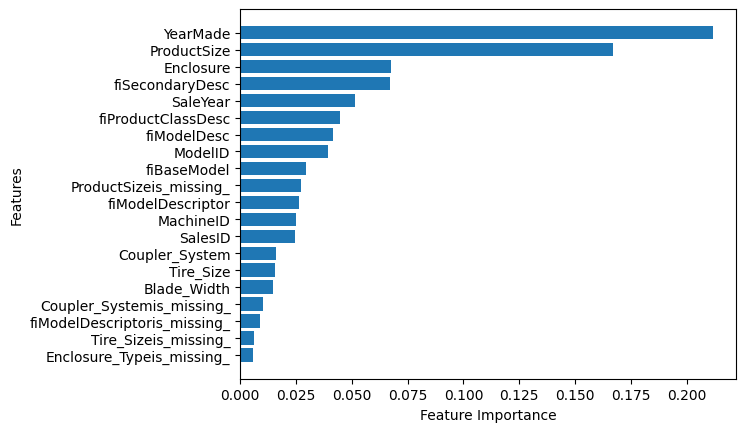

In [92]:
plot_features(X_train.columns, ideal_model.feature_importances_)